<a href="https://colab.research.google.com/github/meliusa/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


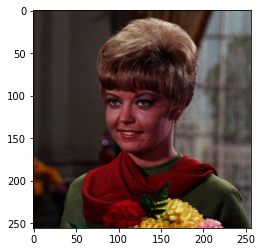

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


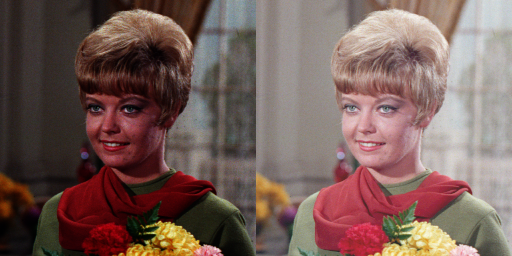

In [ ]:
# no1

print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

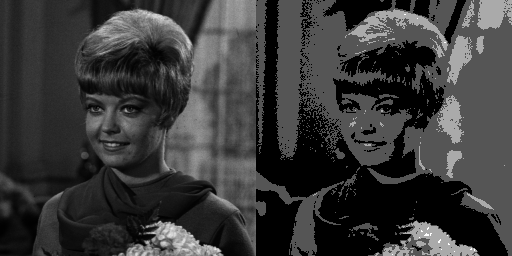

In [ ]:
# no2

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original.shape, original.dtype) 
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
     depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);
img_f = cv.hconcat((original, depth_image))
cv2_imshow(img_f)

Nilai PSNR adalah 27.542453382468757 (dB)


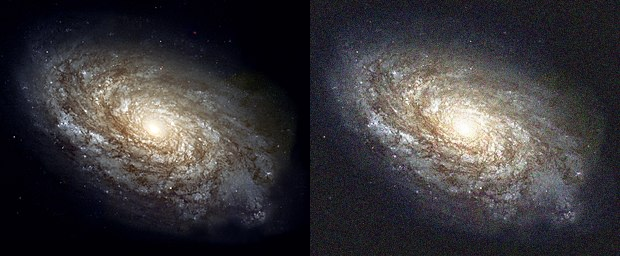

In [ ]:
# no3 jumlah citra di avarage = 5

import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM//noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.507090977481596 (dB)


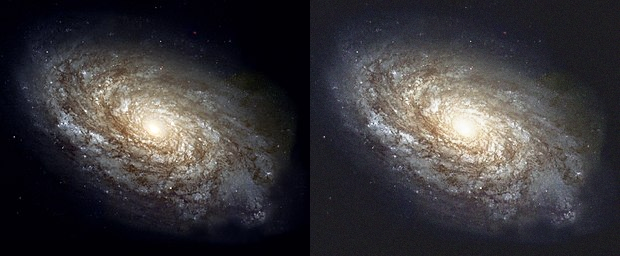

In [ ]:
# no3 jumlah citra di avarage = 30

dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.492176579280784 (dB)


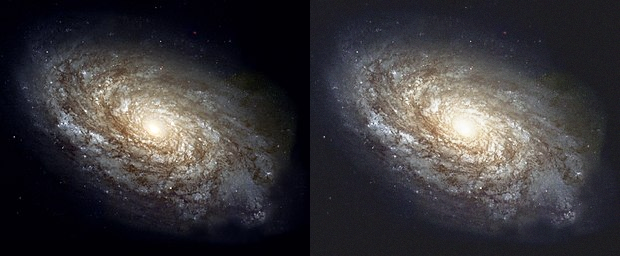

In [ ]:
# no3 jumlah citra di avarage = 60

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.50230158868307 (dB)


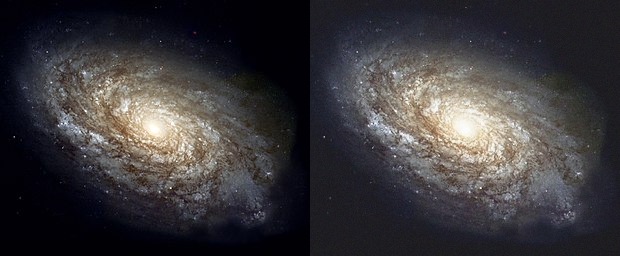

In [ ]:
# no3 jumlah citra di avarage = 80

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.499127682265968 (dB)


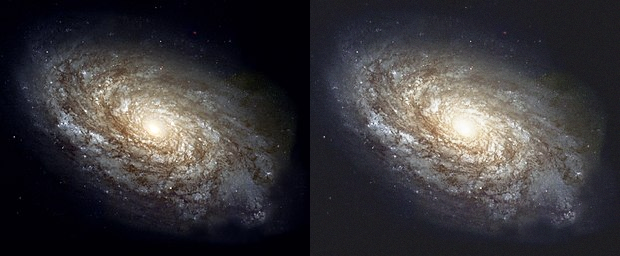

In [ ]:
# no3 jumlah citra di avarage = 100

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**KESIMPULAN**

jumlah citra di average mempengaruhi denoise/output citra dimana semakin besar MSE nya maka semakin bagus hasil citranya. Sebaliknya, semakin kecil RMSE nya maka semakin bagus hasil citranya (semakin banyak gambarnya maka semakin besar jumlah PNSRnya)

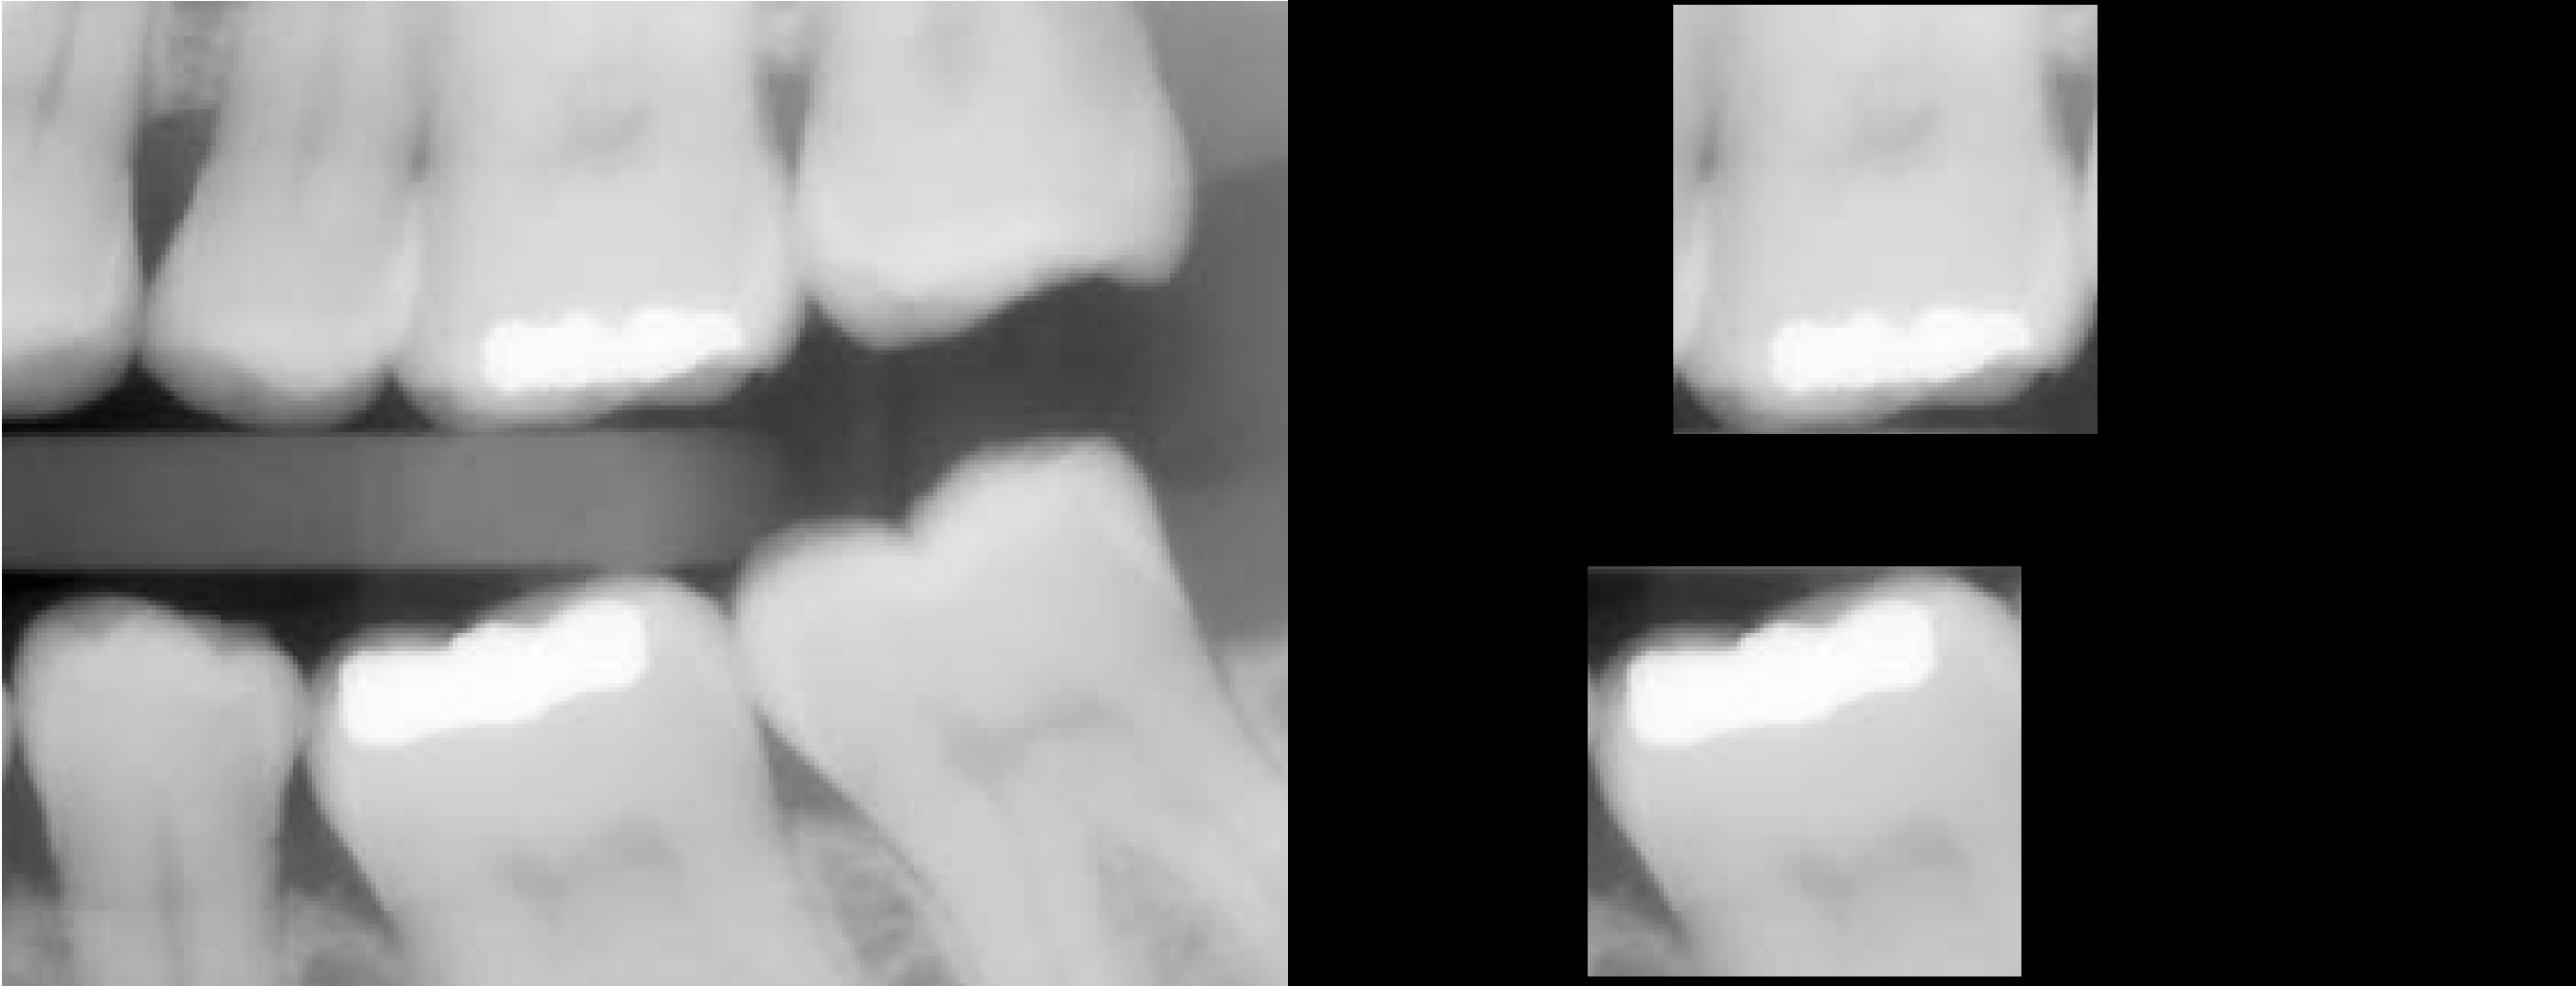

In [ ]:
img_t = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),
                    pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),
                     pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

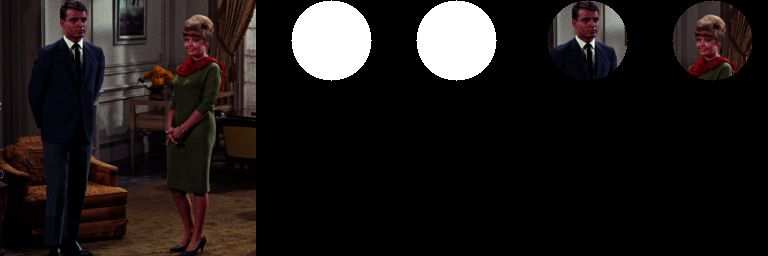

In [ ]:
# no4 and

img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_rose.shape, dtype=np.uint8)

mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)
mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

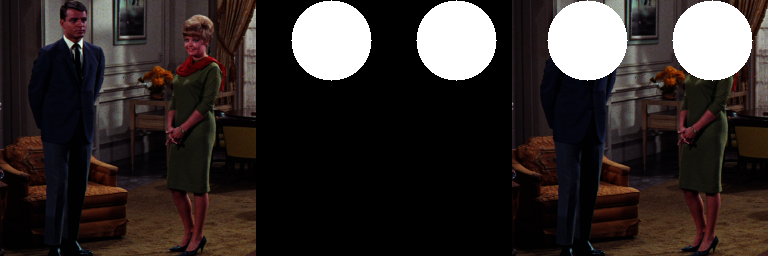

In [ ]:
# no4 or

img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_rose.shape, dtype=np.uint8)

mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)
mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

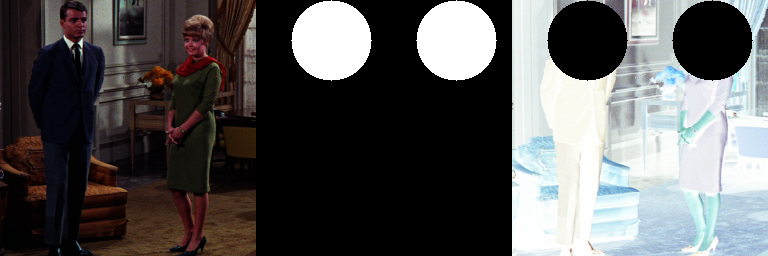

In [ ]:
# no4 not

img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_rose.shape, dtype=np.uint8)

mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)
mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

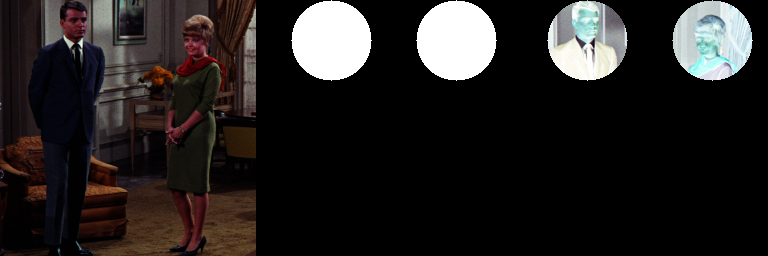

In [ ]:
# no4 nand

img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_rose.shape, dtype=np.uint8)

mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)
mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

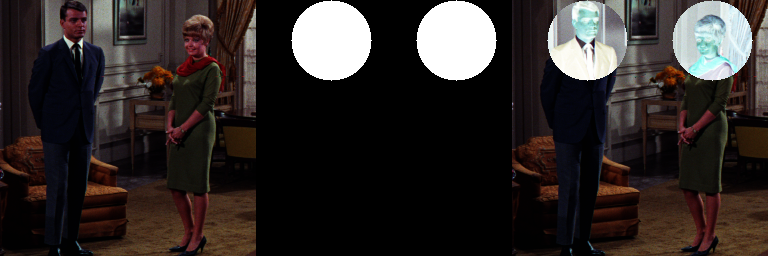

In [ ]:
# no4 xor

img_rose = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')

mask = np.zeros(img_rose.shape, dtype=np.uint8)

mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)
mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

**KESIMPULAN**

Gamma Correction (Power-Law Transformation) is a transformasi di simbolkan dengan huruf yunani 𝛾, dijelaskan sebagai hubungan antara masukan dan keluaran yang dihasilkan. Bit Depth (Bit Depth) is an operasi yang digunakan untuk menunjukkan pada anda tentang kuantisasi citra. PSNR (Peak Signal-to-Noise Ratio) adalah ratio antara nilai power maksimum dan power dari citra yang terkena noise. Average Denoising (Average Denoising) merupakan operasi aritmatika yang dikenakan pada citra untuk berbagai keperluan yang bermanfaat.

